<a href="https://colab.research.google.com/github/KelvinKilonzo97/Data-Science-Projects/blob/main/Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download('INDUSTOWER.NS', start = '2015-1-1', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,333.500000,340.500000,329.850006,339.299988,235.813034,103654
2015-01-02,335.600006,340.600006,334.950012,337.200012,234.353546,371430
2015-01-05,332.500000,347.649994,332.500000,342.399994,237.967514,662811
2015-01-06,342.000000,351.600006,338.299988,341.549988,237.376785,1267514
2015-01-07,342.000000,347.299988,341.649994,342.649994,238.141312,701097


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<Axes: xlabel='Date'>

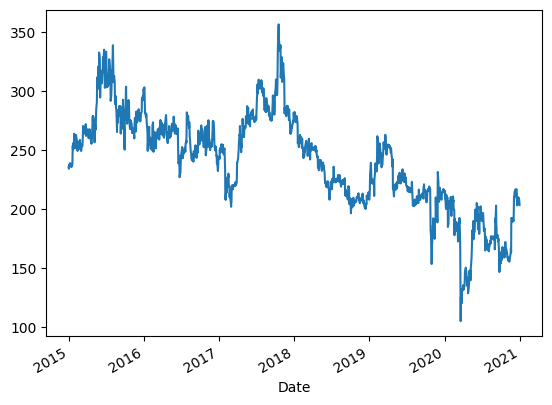

In [ ]:
data['Adj Close'].plot()

In [ ]:
# check stationarity
adfuller(data['Adj Close'])

(-1.9774605070856162,
 0.29654247522852656,
 6,
 1472,
 {'1%': -3.4348002311087007,
  '5%': -2.8635054856234343,
  '10%': -2.5678164050869863},
 9377.724294383683)

In [ ]:
# Difference
data['D Adj Close'] = data['Adj Close'] - data['Adj Close'].shift(1)
data[['Adj Close', 'D Adj Close']].head().dropna()

,Adj Close,D Adj Close
Date,,
2015-01-02,234.353546,-1.459488
2015-01-05,237.967514,3.613968
2015-01-06,237.376785,-0.590729
2015-01-07,238.141312,0.764526


<Axes: xlabel='Date'>

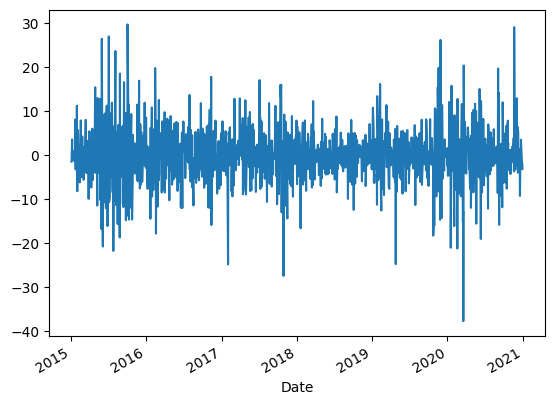

In [ ]:
data['D Adj Close'].plot()

In [ ]:
# Simple returns
data['simple_return'] = data['Adj Close'].pct_change()

# Log Return
# data['log_return'] = np.log(data['Adj Close'] - data['Adj Close'].shift(1))

data['log_return'] = np.log(data['Adj Close'].pct_change() + 1)

In [ ]:
data[['simple_return', 'log_return']]

,simple_return,log_return
Date,,
2015-01-01,NaN,NaN
2015-01-02,-0.006189,-0.006208
2015-01-05,0.015421,0.015303
2015-01-06,-0.002482,-0.002485
2015-01-07,0.003221,0.003216
...,...,...
2020-12-23,0.017186,0.017040
2020-12-24,0.009926,0.009877
2020-12-28,-0.008992,-0.009033


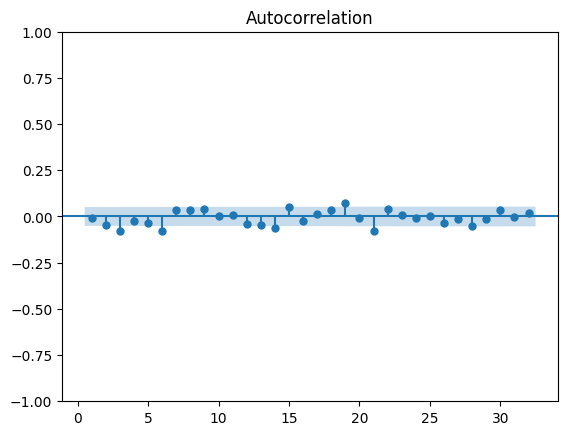

In [ ]:
# Check Correlogram
plot_acf(data['log_return'].dropna(), zero=False);
plt.show()


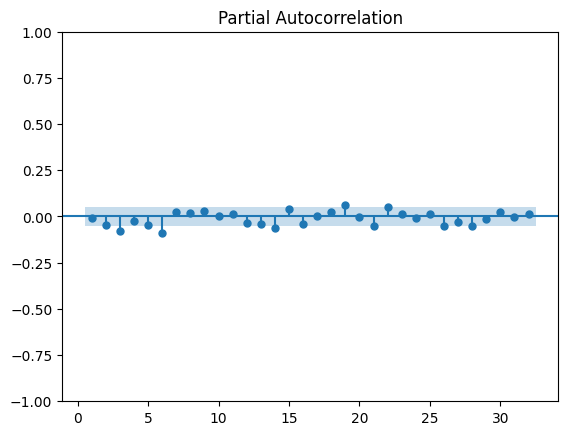

In [ ]:
plot_pacf(data['log_return'].dropna(), zero=False);
plt.show()


In [ ]:
# ARIMA 3,1,3

model = ARIMA(data['Adj Close'].values, order=(3,1,3))
trained_model = model.fit()
print(trained_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1479
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4754.357
Date:                Tue, 09 Jan 2024   AIC                           9522.714
Time:                        16:21:00   BIC                           9559.803
Sample:                             0   HQIC                          9536.541
                               - 1479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2394      0.069      3.467      0.001       0.104       0.375
ar.L2         -0.5115      0.041    -12.597      0.000      -0.591      -0.432
ar.L3          0.7273      0.066     10.989      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


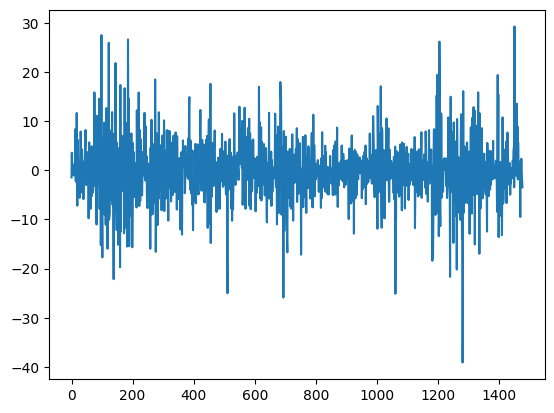

In [ ]:
# To check RESIDUALS
trained_model.forecasts
plt.plot(trained_model.resid[1:])

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

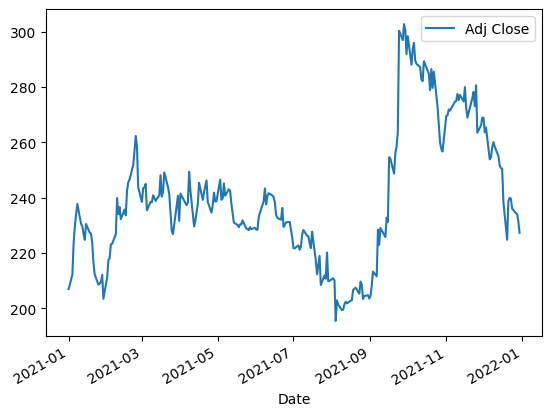

In [ ]:
# TRADING with ARIMA
out_sample_data = yf.download('INDUSTOWER.NS', start='2021-1-1', end='2021-12-31')
out_sample_data = out_sample_data[['Adj Close']]
out_sample_data.plot()

In [ ]:
rolling_window = 66

In [ ]:
df = pd.concat([data[['Adj Close']].iloc[-rolling_window:], out_sample_data])
df

,Adj Close
Date,
2020-09-25,160.700851
2020-09-28,163.426071
2020-09-29,157.140472
2020-09-30,154.107544
2020-10-01,157.316284
...,...
2021-12-24,236.166656
2021-12-27,234.417618
2021-12-28,234.133987


In [ ]:
# Define a function that builds a model, trains it and forecast the price
def predict_using_arima(data):

  # define model
  model = ARIMA(data.values, order=(3,1,3))

  # train model
  trained_model = model.fit()

  # make forecast
  forecast = trained_model.forecast(start_pararms = trained_model.params)

  return forecast

In [ ]:
# create empty column
df['predicted_price'] = np.nan

# predict prices on a rolling basis
df['predicted_price'] = df['Adj Close'].rolling(rolling_window).apply(predict_using_arima)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['start_pararms']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Shift predict price
df['predicted_price']= df['predicted_price'].shift()

In [ ]:
# Calculate daily returns
df['returns'] = df['Adj Close'].pct_change()
df.dropna(inplace=True)

In [ ]:
# go long if predicted price > today's price

df['positions'] = np.where(df['predicted_price'].shift(-1) > df['Adj Close'], 1, -1)

In [ ]:
# compute buy and hold
df['cum_bnh_returns'] = (1 + df['returns']).cumprod()

# compute strategy returns
df['strategy_returns'] = df['returns']*df['positions'].shift()

# cumulative strategy returns
df['cum_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

<Axes: xlabel='Date'>

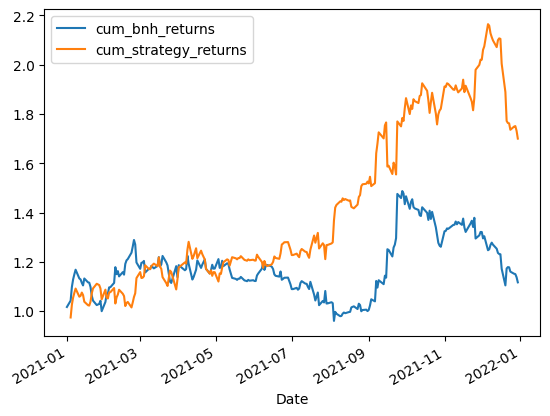

In [ ]:
# Plot
df[['cum_bnh_returns', 'cum_strategy_returns']].plot()

In [ ]:
# !pip install pyfolio
import pyfolio as pf

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2021-01-01
End date,2021-12-30
Total months,11
,Backtest
Annual return,71.9%
Cumulative returns,70.0%
Annual volatility,39.6%
Sharpe ratio,1.57
Calmar ratio,3.35
Stability,0.89
Max drawdown,-21.5%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


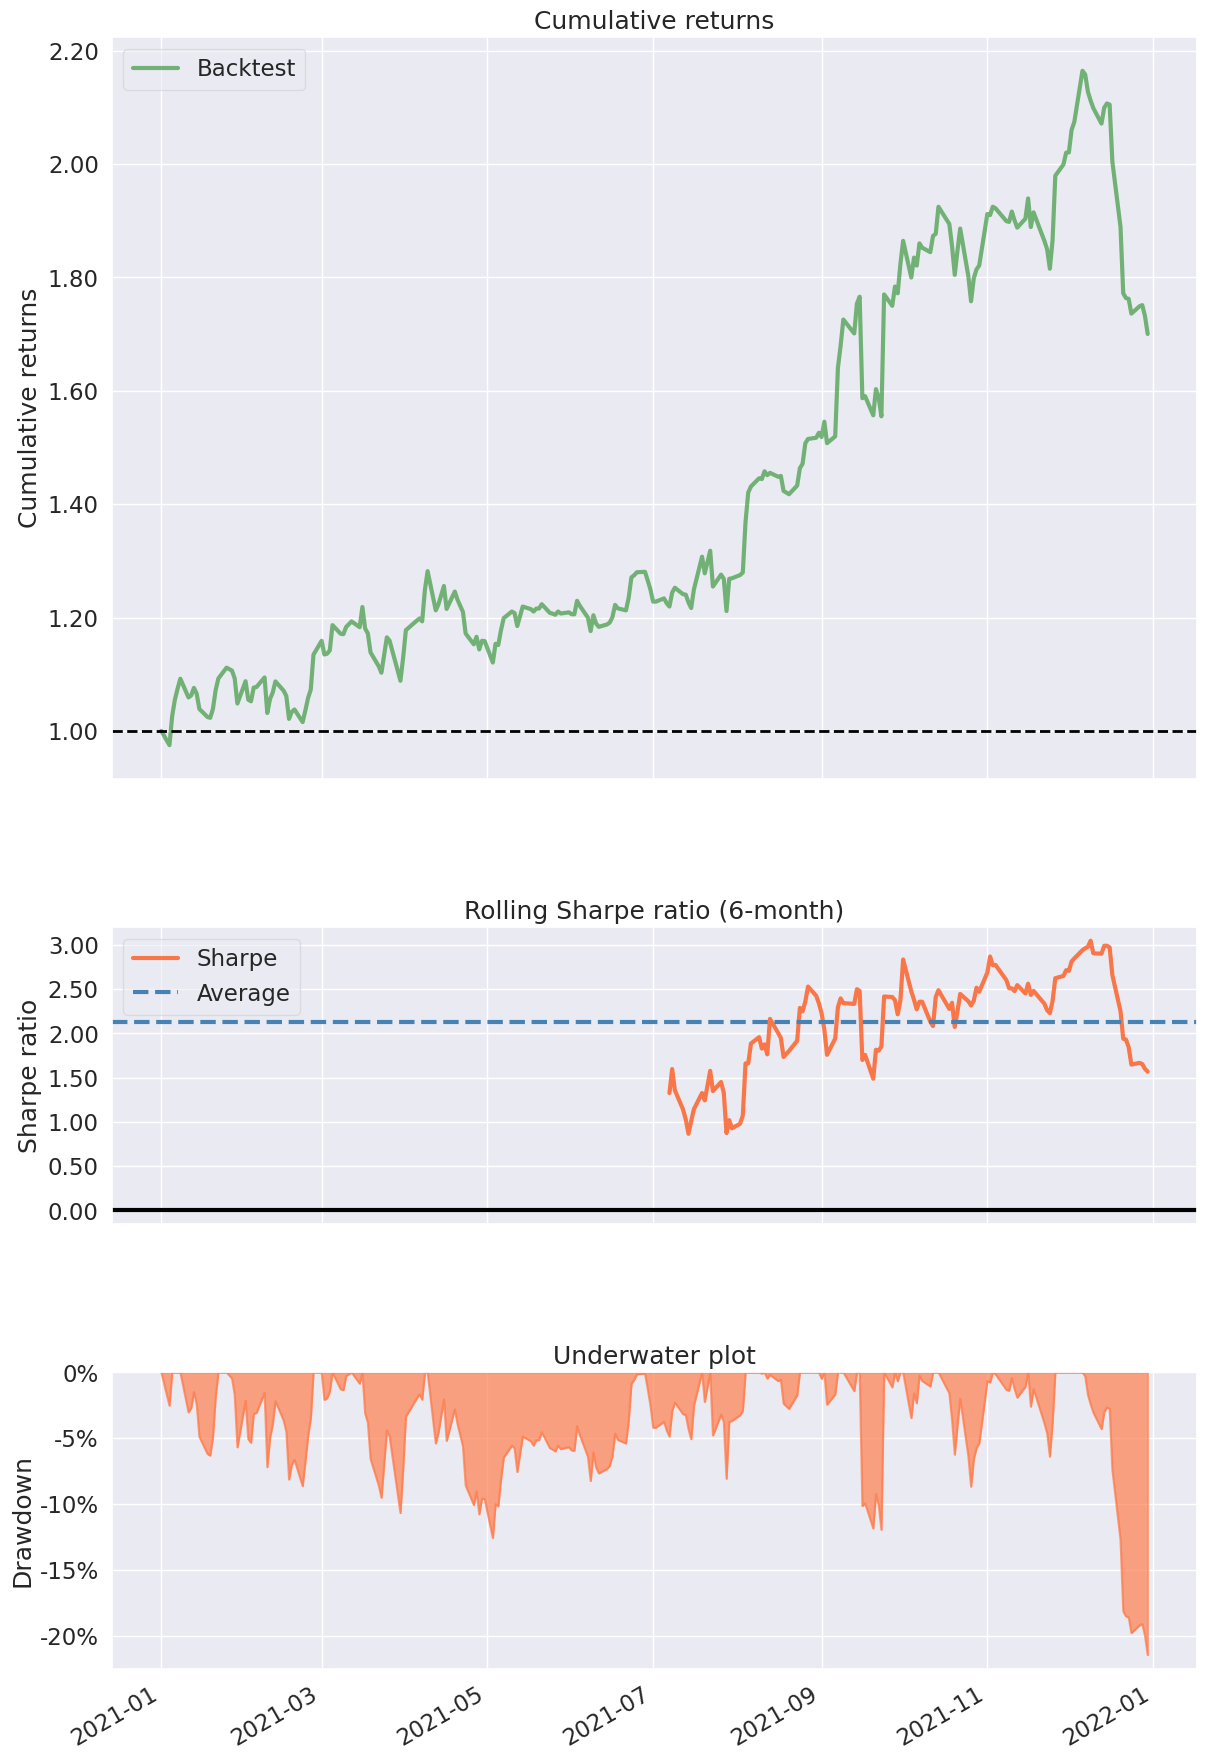

In [ ]:
pf.create_simple_tear_sheet(df['strategy_returns'])